# Support Vector Machines (SVM) – Classification

### What is SVM?
- Support Vector Machine (SVM) is a supervised learning algorithm that finds the optimal hyperplane which best separates data points of different classes in the feature space.
- SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems.
- It finds 2 points in the data set from where it passes an plane and the distance between this two lines from two points and the from center of the distance line is the main line passes which is used to split the data(i seperable line).
- It is also similar to linear regression where it creates a line and seperate it with the help of that line.(the two points are selected with some conditions which are first its distance should be max and second the no of points should be least inside both the lines or Zero )

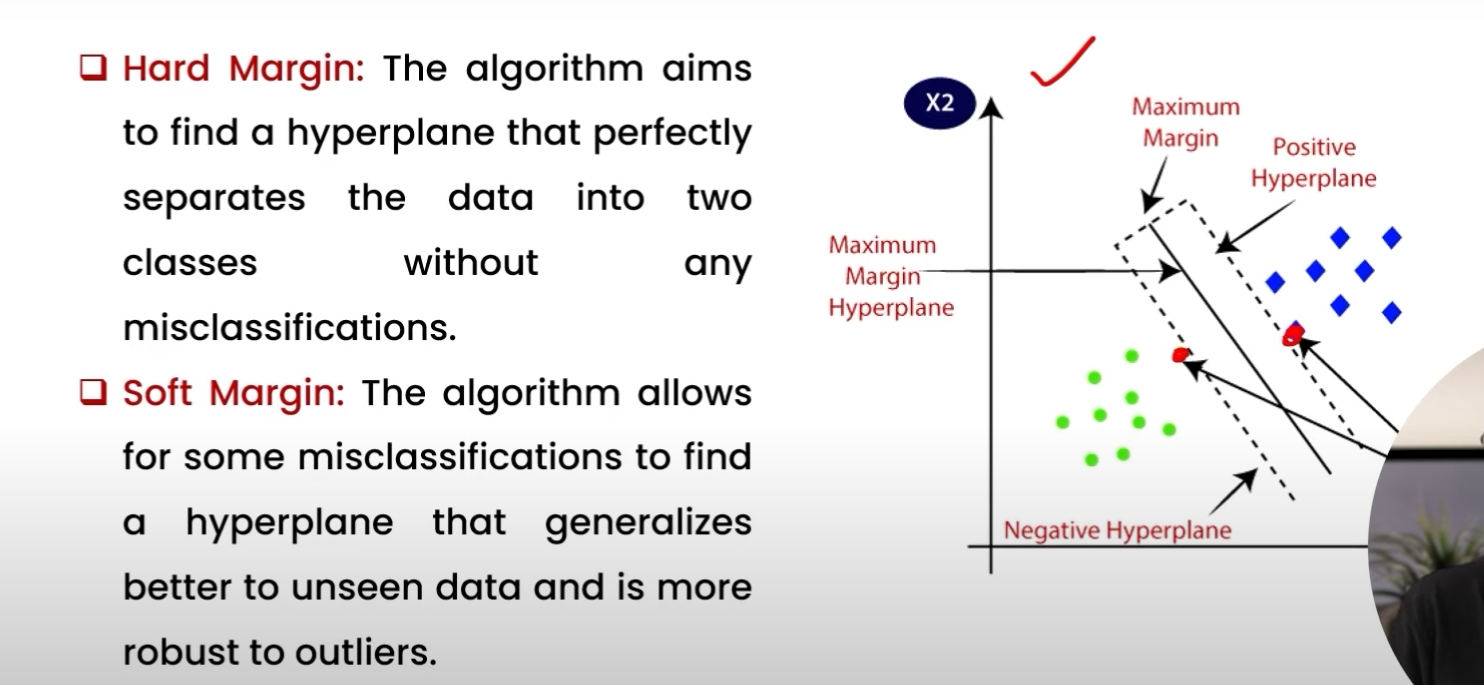

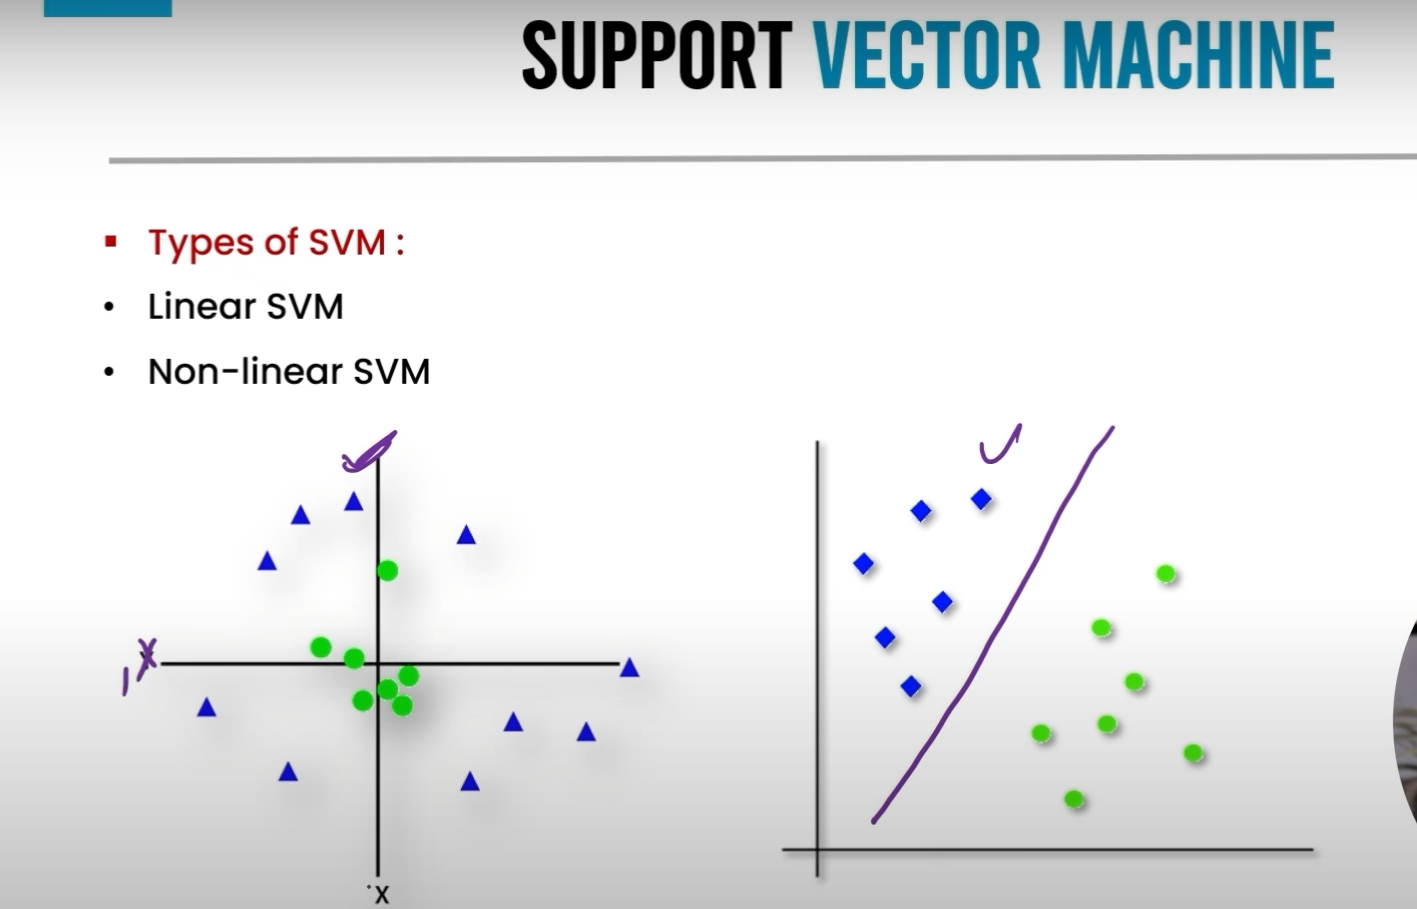

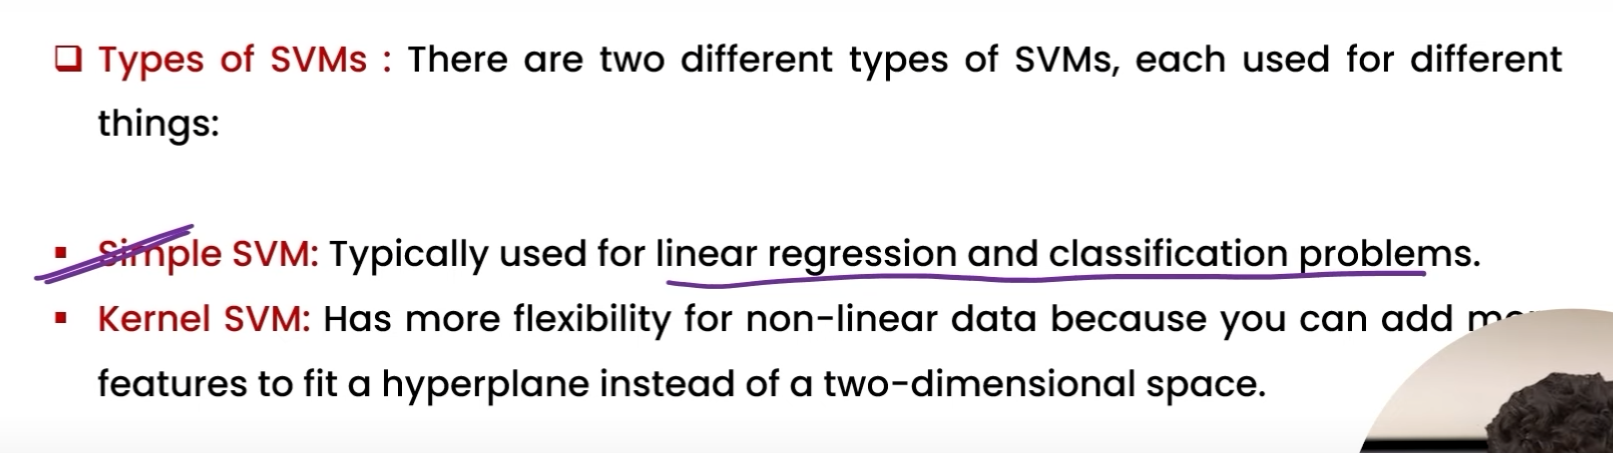

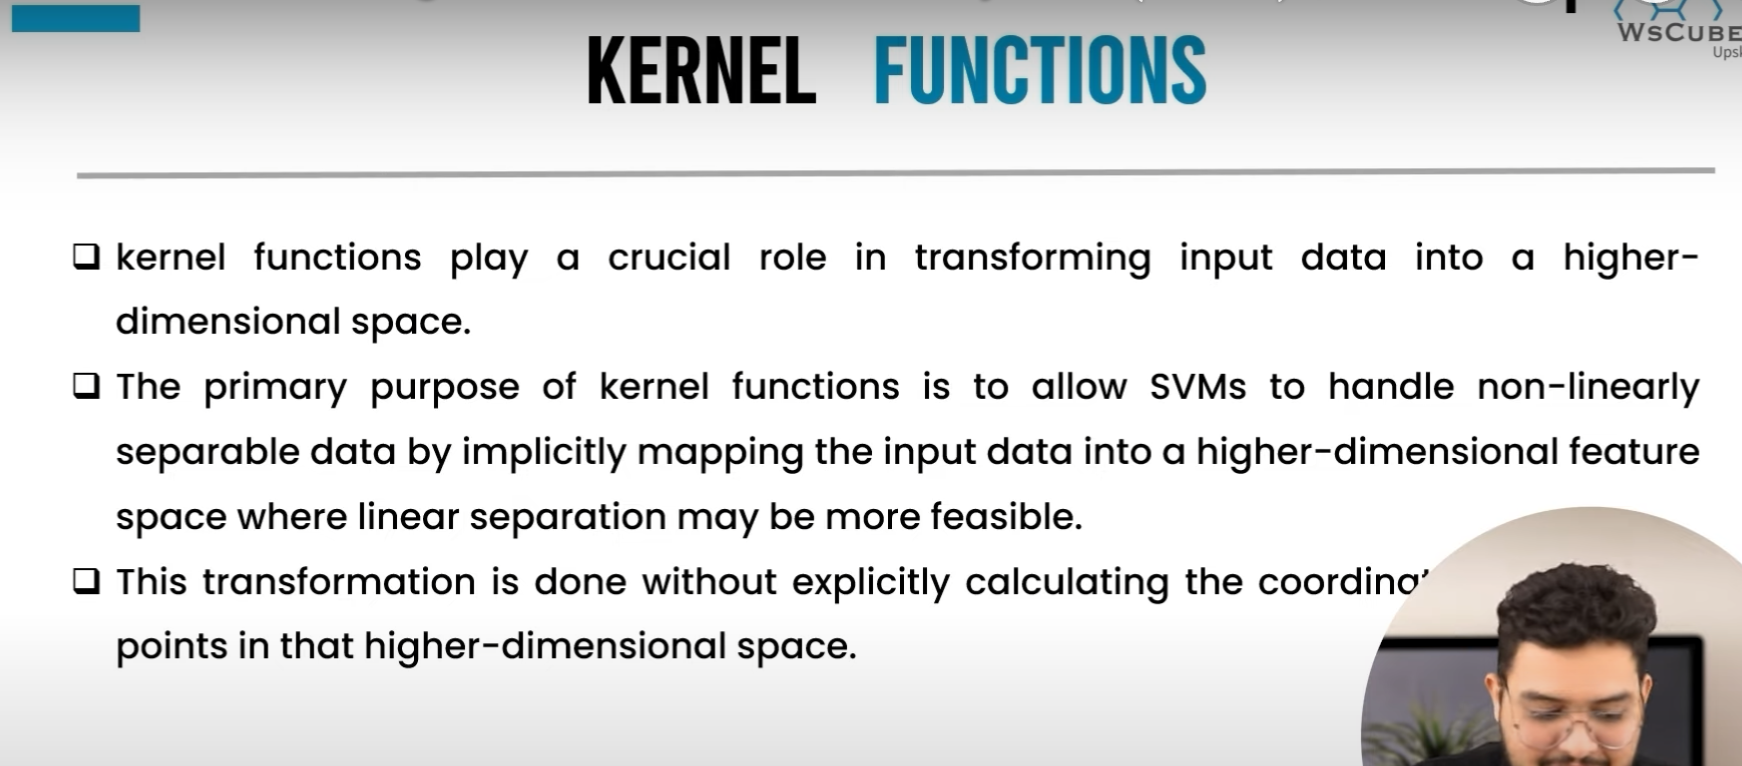

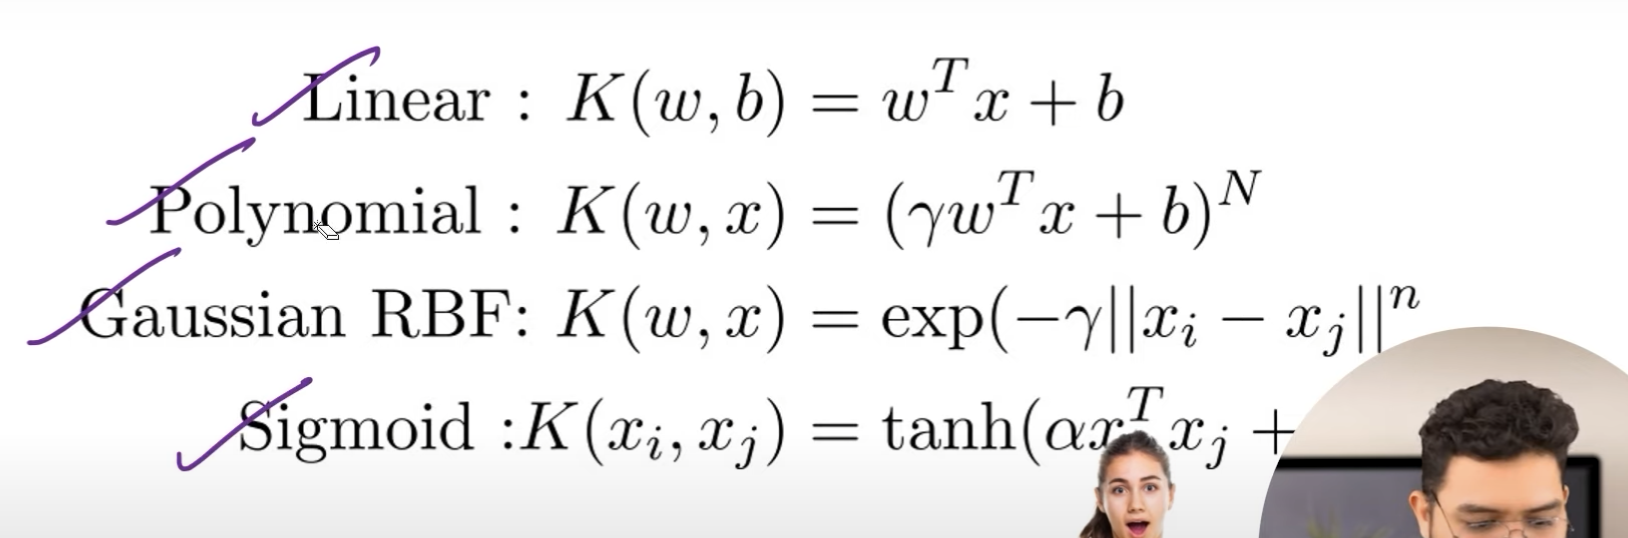

### Mathematical Formulation (Linear SVM)

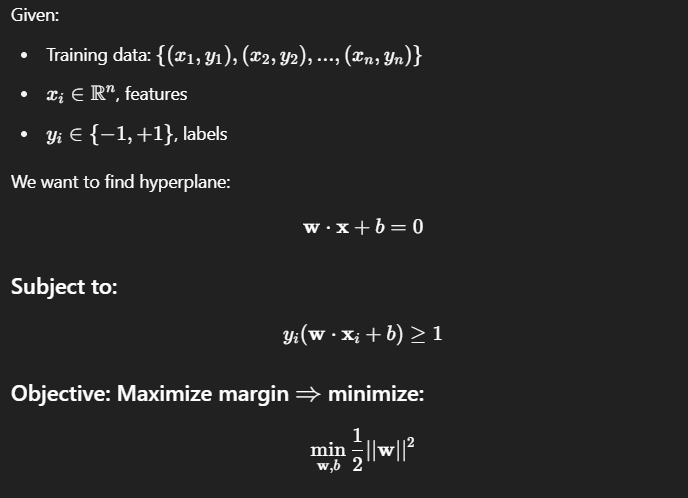



### Soft Margin SVM (with Slack Variable)

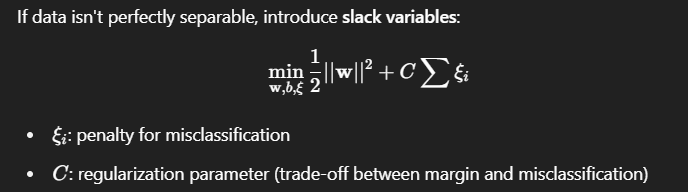

### Kernel Trick (for Nonlinear Data)
- When data is not linearly separable, SVM uses kernel functions to project data into a higher-dimensional space where a hyperplane can separate the data.
- Common Kernels:

| Kernel         | Equation                                  | 
| -------------- | ----------------------------------------- | 
| Linear         | $K(x, x') = x \cdot x'$                   | 
| Polynomial     | $K(x, x') = (x \cdot x' + c)^d$           | 
| RBF (Gaussian) | ( K(x, x') = \exp\left(-\gamma x - x'^2\right)) |
| Sigmoid        | $K(x, x') = \tanh(\alpha x \cdot x' + c)$ |  


### Important Parameters in sklearn.SVC

| Parameter | Description                                                |
| --------- | ---------------------------------------------------------- |
| `kernel`  | Type of kernel: `'linear'`, `'poly'`, `'rbf'`, `'sigmoid'` |
| `C`       | Regularization strength (smaller = wider margin)           |
| `gamma`   | Kernel coefficient for `'rbf'`, `'poly'`, `'sigmoid'`      |
| `degree`  | Degree of polynomial kernel                                |


# Implementation ChatGPT

In [ ]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Create binary classification dataset
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train linear SVM
model = SVC(kernel='linear', C=1)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.82      0.88        34
           1       0.80      0.92      0.86        26

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.88      0.87      0.87        60



# Visualize SVM Decision Boundary (2D)

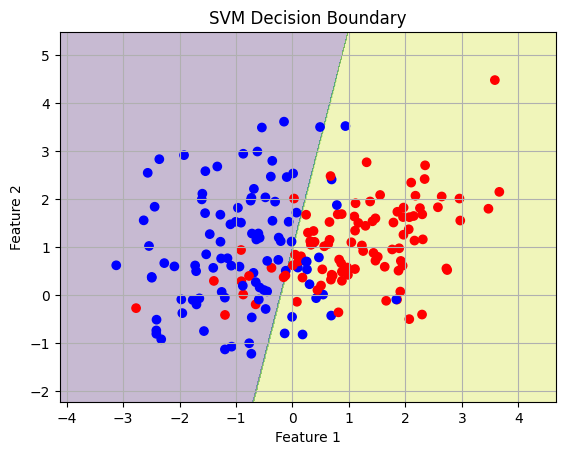

In [2]:
import numpy as np

# Create mesh
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 500),
                     np.linspace(X[:,1].min()-1, X[:,1].max()+1, 500))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.title("SVM Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


----

# Implementation From YouTube

In [92]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from mlxtend.plotting import plot_decision_regions
import numpy as np

In [6]:
ds = pd.read_csv('placement-dataset.csv')
ds.head()

,cgpa,iq,placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0
3,7.4,132,1
4,5.8,142,0


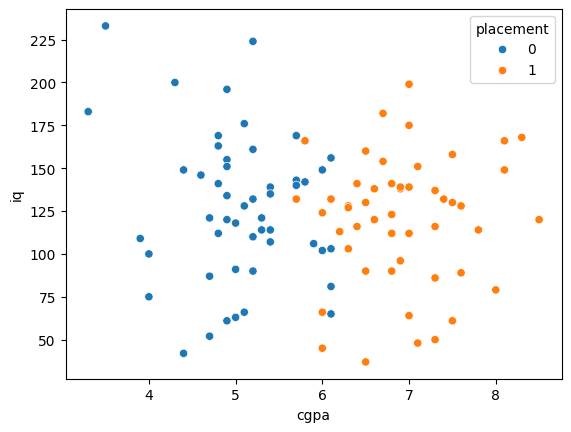

In [14]:
sns.scatterplot(x='cgpa', y= 'iq', data= ds, hue= 'placement')
plt.show()

In [7]:
x = ds.drop(columns=['placement'])
y = ds['placement']
x, y

(    cgpa   iq
 0    6.8  123
 1    5.9  106
 2    5.3  121
 3    7.4  132
 4    5.8  142
 ..   ...  ...
 95   4.3  200
 96   4.4   42
 97   6.7  182
 98   6.3  103
 99   6.2  113
 
 [100 rows x 2 columns],
 0     1
 1     0
 2     0
 3     1
 4     0
      ..
 95    0
 96    0
 97    1
 98    1
 99    1
 Name: placement, Length: 100, dtype: int64)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

In [87]:
# Train linear SVM
model = SVC(kernel='linear', C=1)
model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [88]:
# Predict
y_pred = model.predict(X_test)

In [89]:
model.score(X_test, y_test)*100

95.0

In [90]:
model.score(X_train, y_train)*100

91.25

C:\Users\Dev\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


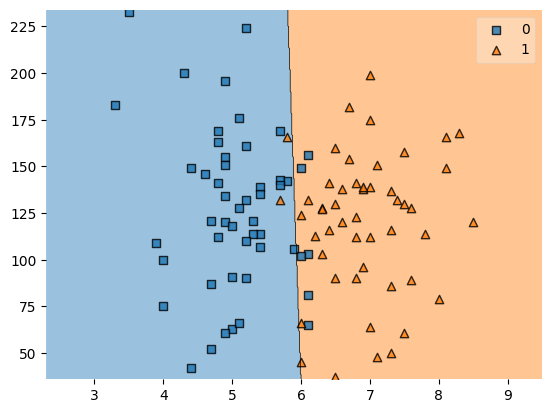

In [94]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf = model)
plt.show()